In [1]:
# play with kllr code 

In [16]:
%load_ext autoreload
%autoreload 2
%aimport
# %reload_ext autoreload

import sys 
from os.path import abspath
path = abspath('../..')
if path not in sys.path: 
    sys.path.insert(0, path)
print(path)

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:

/home/imendoza/alcca/nbody-relaxed


In [8]:
from astropy.table import Table, Column

In [9]:
from relaxed import utils 
from relaxed.frames import params, catalogs
from relaxed.subhalos import subhalo

from pminh import minh


In [12]:
from packages.kllr import kllr 
from packages.kllr.kllr import * 

In [13]:
hcat_filepath = Path('/home/imendoza/alcca/nbody-relaxed/data/phils_catalogues/'
                    'halo_catalogues/Bolshoi/BolshoiP/minh/hlist_1.00000.minh')
name = 'BolshoiP'

# Example w/ TNG

## load data

In [17]:
df = pd.read_csv('./TNG300_Halos.csv')

print(df.columns)

df = df[df.M200 > 13.5]
Colors = ['#FF7F0E', 'mediumseagreen', 'mediumpurple', 'steelblue']

Index(['M200', 'R200', 's_DM', 'q_DM', 'Mean_Vx_DM', 'Mean_Vy_DM',
       'Mean_Vz_DM', 'sigma_DM_1D', 'sigma_DM_3D', 'z_form', 'c200c',
       'NFW_chi2', 'c200c_NoSubs', 'NFW_chi2_NoSubs', 'c200c_Einasto_NoSubs',
       'NFW_chi2_Einasto_NoSubs', 'MStar', 'MGas', 'MGas_Hot', 'MGas_T',
       's_Gas', 'q_Gas', 'dSigma_0', 'dSigma_1', 'dSigma_2', 'dSigma_3',
       'dSigma_4', 'dSigma_5', 'dSigma_6', 'dSigma_7', 'dSigma_8', 'dSigma_9',
       'dSigma_NoSubs_0', 'dSigma_NoSubs_1', 'dSigma_NoSubs_2',
       'dSigma_NoSubs_3', 'dSigma_NoSubs_4', 'dSigma_NoSubs_5',
       'dSigma_NoSubs_6', 'dSigma_NoSubs_7', 'dSigma_NoSubs_8',
       'dSigma_NoSubs_9', 'MStar_BCG100'],
      dtype='object')


# simple regressions

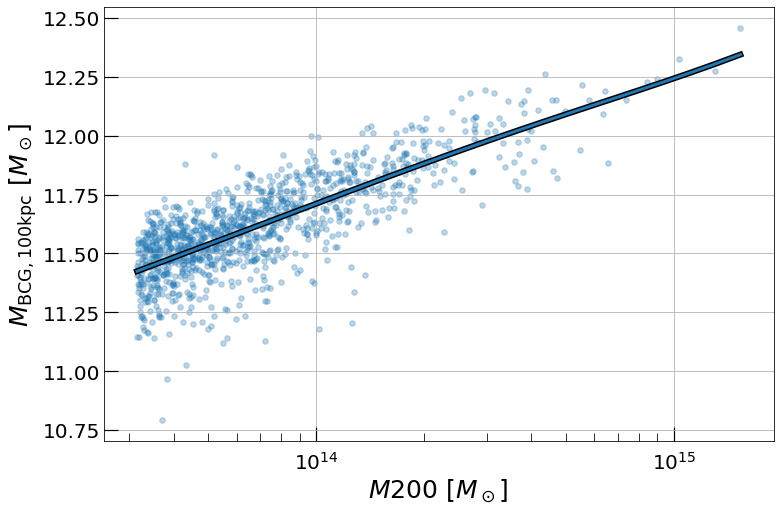

In [18]:
# simple reAgression with gaussian kernel. 
#xlog just sets the x-axis scale to be log. 
data, ax = Plot_Fit(df, 'M200', 'MStar_BCG100', show_data=True, ax=None, xlog=True, kernel_width=0.4,
                    ylog=False, labels=[r'$M200\,\,[M_\odot]$', r'$M_{\rm BCG, 100kpc}\,\,[M_\odot]$'])
plt.show()

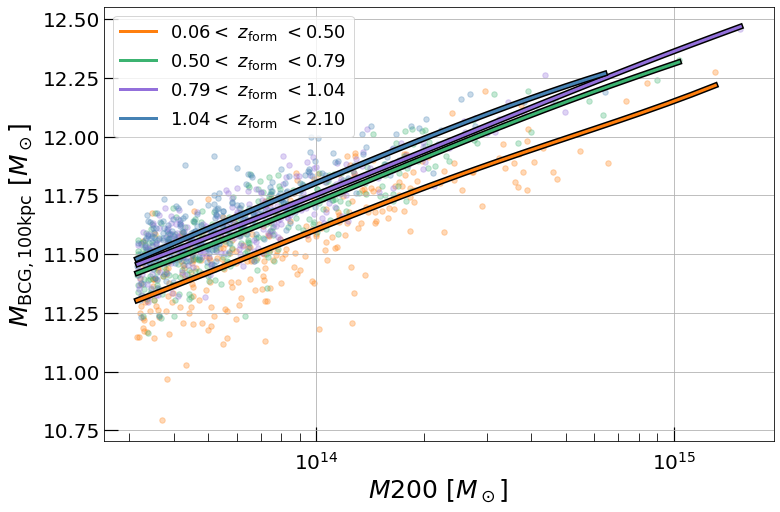

In [20]:
# regressing MStar_BCG100 against M200
# splitting on formation time.
# xlog/ylog specifies if the quantities in x/y axis are log quantities.
# split_bins: specifies how many bins it should use it split on equal size quantiles.
data, ax = Plot_Fit_Split(df, 'M200', 'MStar_BCG100', 'z_form', show_data=True, xlog=True, ylog=False, split_bins=4,
                          color = Colors, kernel_width=0.4,
                          labels = [r'$M200\,\,[M_\odot]$', r'$M_{\rm BCG, 100kpc}\,\,[M_\odot]$', r'$z_{\rm form}$'])
plt.show()


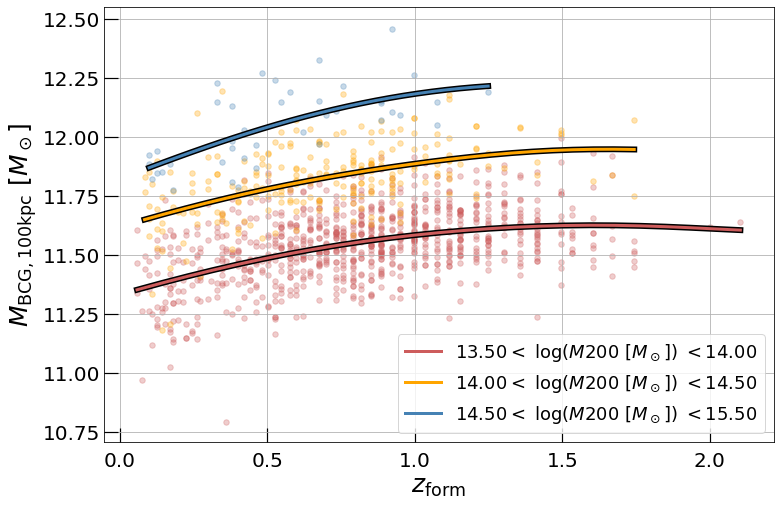

In [21]:

# regressing  MStar_BCG100 against z_form
# splitting on halo mass
# you can define the boundaries of your split variable instead of splitting them into equal quantiles.
data, ax = Plot_Fit_Split(df, 'z_form', 'MStar_BCG100', 'M200', show_data=True, xlog=False, ylog=False, split_bins=[13.5, 14, 14.5, 15.5],
                          kernel_width=0.4, color = ['indianred', 'orange', 'steelblue'],
                          labels = [r'$z_{\rm form}$', r'$M_{\rm BCG, 100kpc}\,\,[M_\odot]$', r'$\log(M200\,\,[M_\odot])$'])
plt.show()

## fit parameters

100%|██████████| 200/200 [00:08<00:00, 25.49it/s]


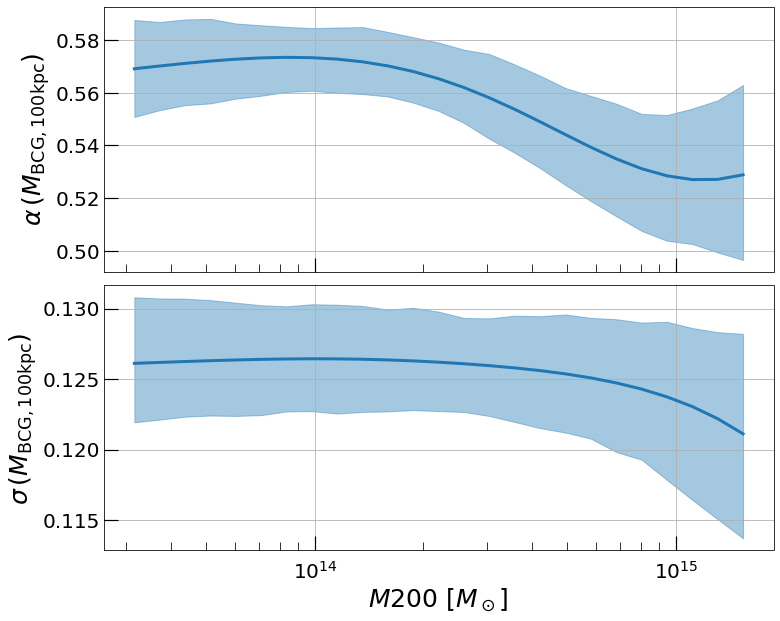

In [22]:
# hmm physical interpretation??? 
# sigma is described in 2018 paper before equation (2) 
Plot_Fit_Params(df, 'M200', 'MStar_BCG100', kernel_width=0.4, nBootstrap=200,
                xlog = True, labels=[r'$M200\,\,[M_\odot]$', r'$M_{\rm BCG, 100kpc}$'])
plt.show()

100%|██████████| 200/200 [00:18<00:00, 10.88it/s]


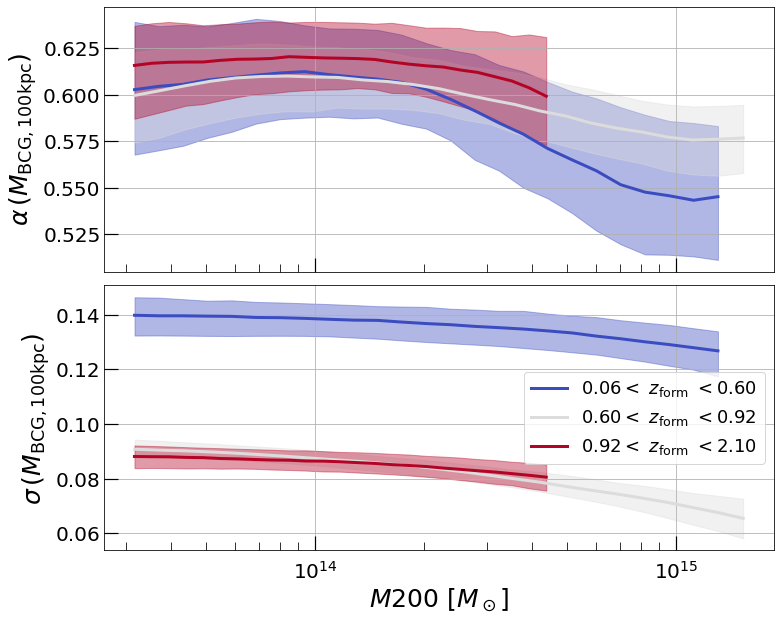

In [23]:

Plot_Fit_Params_Split(df, 'M200', 'MStar_BCG100', 'z_form', split_bins=3, kernel_width=0.4, xlog = True, nBootstrap=200,
                      labels=[r'$M200\,\,[M_\odot]$', r'$M_{\rm BCG, 100kpc}$', r'$z_{\rm form}$'])
plt.show()


## correlations 

In [ ]:
# plot the conditional correlation/covariance matrix of a set of parameters
# Output_mode defined whether it should be the correlation or covariance matrix.
ax = Plot_Cov_Corr_Matrix(df, 'M200', ['MGas', 'MGas_T', 'c200c'],  kernel_width=0.4, nBootstrap=200,
                          labels=[r'$M_{200}\,\,[M_\odot]$', r'$M_{\rm gas}$', r'$T_X$', r'$c$'],
                          Output_mode='corr')
plt.show()


100%|██████████| 2/2 [00:04<00:00,  2.50s/it]

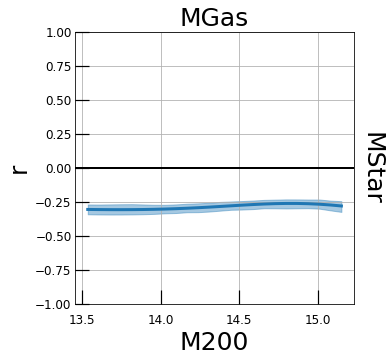

In [25]:
ax = Plot_Cov_Corr_Matrix(df, 'M200', ['MGas', 'MStar'], nBootstrap=50, kernel_width=0.4, Output_mode='corr')
plt.show()

## Residuals 

100%|██████████| 200/200 [00:00<00:00, 4269.53it/s]
No handles with labels found to put in legend.


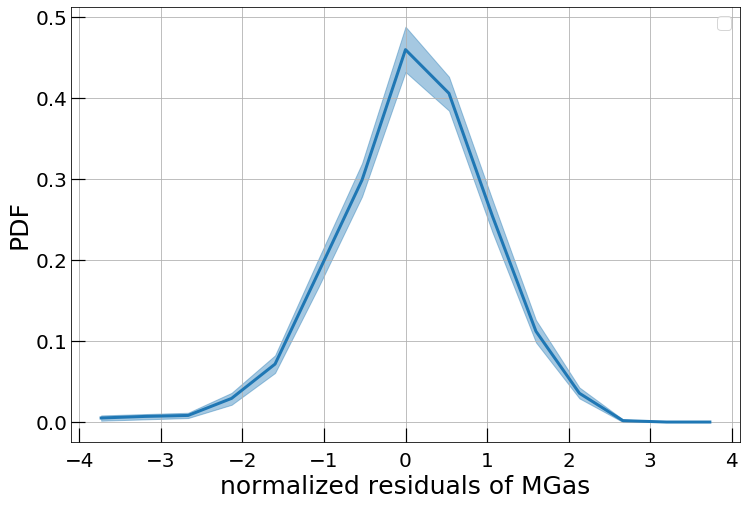

In [19]:
# in case you want to study resoduals to make sure they follow the log-normal / normal model you assumed
data, ax = Plot_Residual(df, 'M200', 'MGas', nBootstrap=200, kernel_width=0.4)
plt.show()

# Use my data 

## load data

## residuals to check if compatible